![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Read `Salaries.csv` as a dataframe called `sal`.**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
sal = pd.read_csv('gdrive/My Drive/CoderSchool-DAwP/Data/Salaries.csv')

**Check the head of the DataFrame.**

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [6]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [7]:
print('Lowest amount of BasePay: {}'.format(sal['BasePay'].min()))

Lowest amount of BasePay: -166.01


In [8]:
print('Highest amount of BasePay: {}'.format(sal['BasePay'].max()))

Highest amount of BasePay: 319275.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [9]:
print('Agerage amount of OvertimePay: {}'.format(sal['OvertimePay'].mean()))
print('Lowest amount of OvertimePay: {}'.format(sal['OvertimePay'].min()))
print('Highest amount of OvertimePay: {}'.format(sal['OvertimePay'].max()))

Agerage amount of OvertimePay: 5066.059886444622
Lowest amount of OvertimePay: -0.01
Highest amount of OvertimePay: 245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [10]:
sal[sal['EmployeeName'] == 'Joseph Driscoll']['EmployeeName']

36198    Joseph Driscoll
Name: EmployeeName, dtype: object

In [11]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName'] == 'GARY JIMENEZ']['EmployeeName']

1    GARY JIMENEZ
Name: EmployeeName, dtype: object

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [12]:
sal[sal['EmployeeName'] == 'Joseph Driscoll']['TotalPayBenefits']

36198    331834.79
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [13]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [14]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [0]:
# Joe owes money.

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [16]:
sal.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [17]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [18]:
sal['JobTitle'].value_counts()[:3]

Transit Operator    7036
Special Nurse       4389
Registered Nurse    3736
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [19]:
sal[sal['Year'] == 2013]['JobTitle'].value_counts().nunique()

152

**How many people have the word Chief in their job title?**

In [20]:
sal[sal['JobTitle'].str.contains('chief')]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [21]:
sal[sal['JobTitle'].str.contains('Chief')]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,NaN,San Francisco,NaN
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,NaN,San Francisco,NaN
36169,36170,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2012,NaN,San Francisco,NaN
36170,36171,Samson Lai,"Battlion Chief, Fire Suppressi",174822.44,112731.28,28660.28,53249.56,316214.00,369463.56,2012,NaN,San Francisco,NaN
36171,36172,Rudy Castellanos,"Battlion Chief, Fire Suppressi",176771.74,124413.13,15803.39,52320.90,316988.26,369309.16,2012,NaN,San Francisco,NaN
36172,36173,Marty Ross,"Battlion Chief, Fire Suppressi",174822.41,99623.51,36522.39,55353.92,310968.31,366322.23,2012,NaN,San Francisco,NaN
36173,36174,Mark Kearney,Assistant Deputy Chief 2,124573.50,22599.60,180516.68,32381.00,327689.78,360070.78,2012,NaN,San Francisco,NaN
36179,36180,Michael Morris,Assistant Deputy Chief 2,223371.00,7415.52,63426.03,56202.98,294212.55,350415.53,2012,NaN,San Francisco,NaN
36181,36182,James Dudley,Deputy Chief 3,263426.50,0.00,22857.87,59265.59,286284.37,345549.96,2012,NaN,San Francisco,NaN
36190,36191,Thomas Harvey,Assistant Deputy Chief 2,226475.05,0.00,54967.53,55722.16,281442.58,337164.74,2012,NaN,San Francisco,NaN


In [22]:
sal[sal['JobTitle'].str.contains("CHIEF")]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,NaN,299494.17,299494.17,2011,NaN,San Francisco,NaN
14,15,DAVID FRANKLIN,"BATTALION CHIEF, (FIRE DEPARTMENT)",174872.64,74050.30,37424.11,NaN,286347.05,286347.05,2011,NaN,San Francisco,NaN
18,19,MARTY ROSS,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.63,69626.12,38115.47,NaN,276434.22,276434.22,2011,NaN,San Francisco,NaN
23,24,VICTOR WYRSCH,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.63,77896.14,24083.86,NaN,270672.63,270672.63,2011,NaN,San Francisco,NaN
25,26,GREGORY SUHR,CHIEF OF POLICE,256470.41,0.00,11522.18,NaN,267992.59,267992.59,2011,NaN,San Francisco,NaN


In [23]:
job1 = sal[sal['JobTitle'].str.contains('chief')].shape[0]
job2 = sal[sal['JobTitle'].str.contains('Chief')].shape[0]
job3 = sal[sal['JobTitle'].str.contains("CHIEF")].shape[0]
print('{} people have the word Chief in JobTitle'.format(job1 + job2 + job3))

627 people have the word Chief in JobTitle


## Data Visualization

**Implement seaborn's countplot with x='Year'**

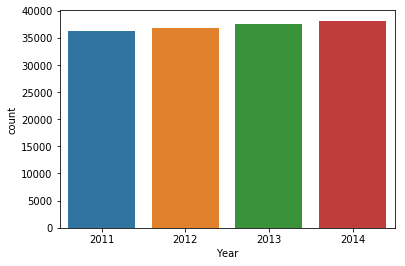

In [24]:
sns.countplot(data=sal, x='Year')

**Implement seaborn's distplot for BasePay of Year 2011**

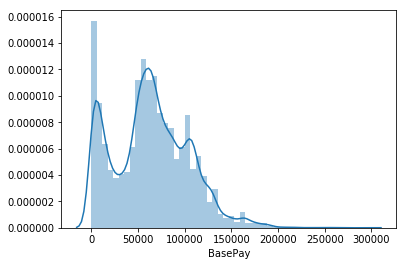

In [25]:
sns.distplot(sal[sal['Year'] == 2011]['BasePay'])

**How about other Year**

In [26]:
sal['Year'].unique()

array([2011, 2012, 2013, 2014])

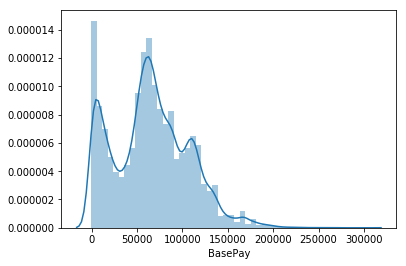

In [27]:
sns.distplot(sal[sal['Year'] == 2012]['BasePay'])

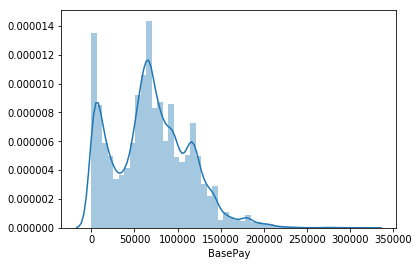

In [28]:
sns.distplot(sal[sal['Year'] == 2013]['BasePay'].dropna())

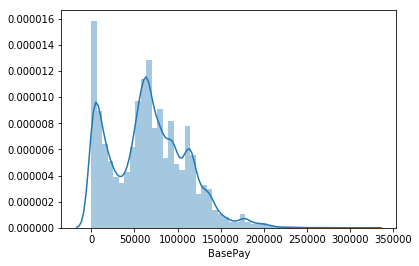

In [29]:
sns.distplot(sal[sal['Year'] == 2014]['BasePay'].dropna())

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [0]:
sal1 = sal[['JobTitle', 'BasePay', 'Benefits', 'OvertimePay']]
sal2 = sal1.groupby('JobTitle').mean()

In [0]:
sal3 = sal1['JobTitle'].value_counts()[:5]
index = sal3.index

In [32]:
result = sal2.loc[index, :]
result

,BasePay,Benefits,OvertimePay
Transit Operator,51772.154465,27355.597533,11143.260866
Special Nurse,29929.166718,3210.342240,651.723372
Registered Nurse,102650.396486,35950.834170,4204.840575
Public Svc Aide-Public Works,8091.876070,1379.748050,60.017744
Police Officer 3,108508.662621,32829.713693,16418.062615


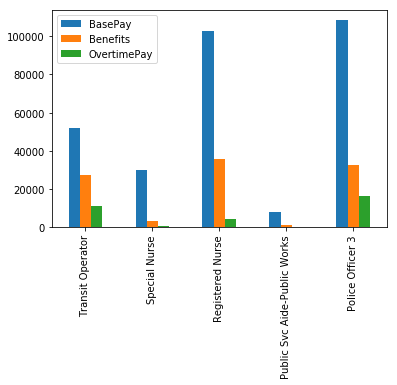

In [33]:
result.plot.bar()

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [0]:
# sal4 = sal[['JobTitle', 'TotalPayBenefits']]
sal['LengthJobTitle'] = sal['JobTitle'].apply(len)

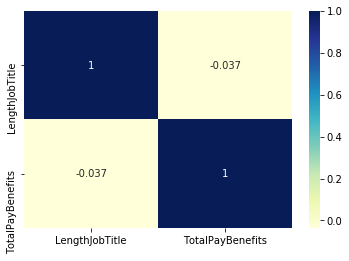

In [35]:
sns.heatmap(data=sal[['LengthJobTitle', 'TotalPayBenefits']].corr(), annot=True, cmap='YlGnBu')

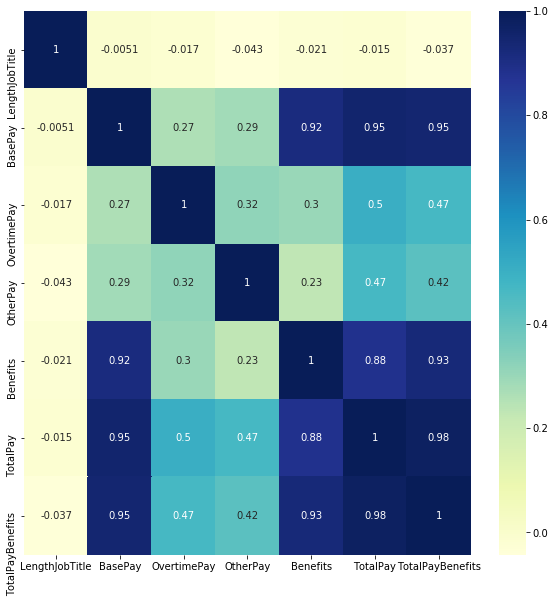

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=sal[['LengthJobTitle', 'BasePay', 'OvertimePay',	'OtherPay',	'Benefits',	'TotalPay',	'TotalPayBenefits']].corr(), annot=True, cmap='YlGnBu')

# Great Job!